In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data from the csv file

bike = pd.read_csv('/Users/Dhruv/Downloads/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
print(bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [4]:
bike.shape

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking if there are any null values in the data

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
#from the data looks like Season,month,weathersit,weekday have numerical data...so lets convert it in categorical data
# and replace it with appropriate data

bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [10]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
#Same process we will follow with  'month',weathersit' and 'weekday' column

def assign_mnth(x):
    return x.map({
        1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
        11:'Nov',12:'Dec'
    })

In [12]:
bike[['mnth']] = bike[['mnth']].apply(assign_mnth)
bike['mnth'].value_counts()

Jan    62
Oct    62
May    62
Dec    62
Aug    62
Mar    62
Jul    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [13]:
bike['weathersit'] = bike['weathersit'].replace({1:'clear',2:'mist',3:'lightsnow',4:'heavyrain'})

In [14]:
bike['weathersit'].value_counts()

clear        463
mist         246
lightsnow     21
Name: weathersit, dtype: int64

In [15]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",
                         5:"Friday",6:"Saturday"},inplace=True)


In [16]:
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,Jan,0,Saturday,0,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,Jan,0,Sunday,0,mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,Jan,0,Monday,1,mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,Jan,0,Tuesday,1,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,Jan,0,Wednesday,1,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [17]:
#From the data set we can understand that the 'instant' column is just the serial number so we can drop it.

bike.drop(['instant'],axis=1,inplace=True)

In [18]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
#The 'dteday' column is also of no use to our analysis, so we can drop that column as well

bike.drop(['dteday'],axis=1,inplace=True)

In [20]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
# Now we know that 'casual' and 'registered' together sum to 'cnt'. Since cnt is our target variable we can ignore 
#casual and registered and delete these 2 columns

bike.drop(['casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


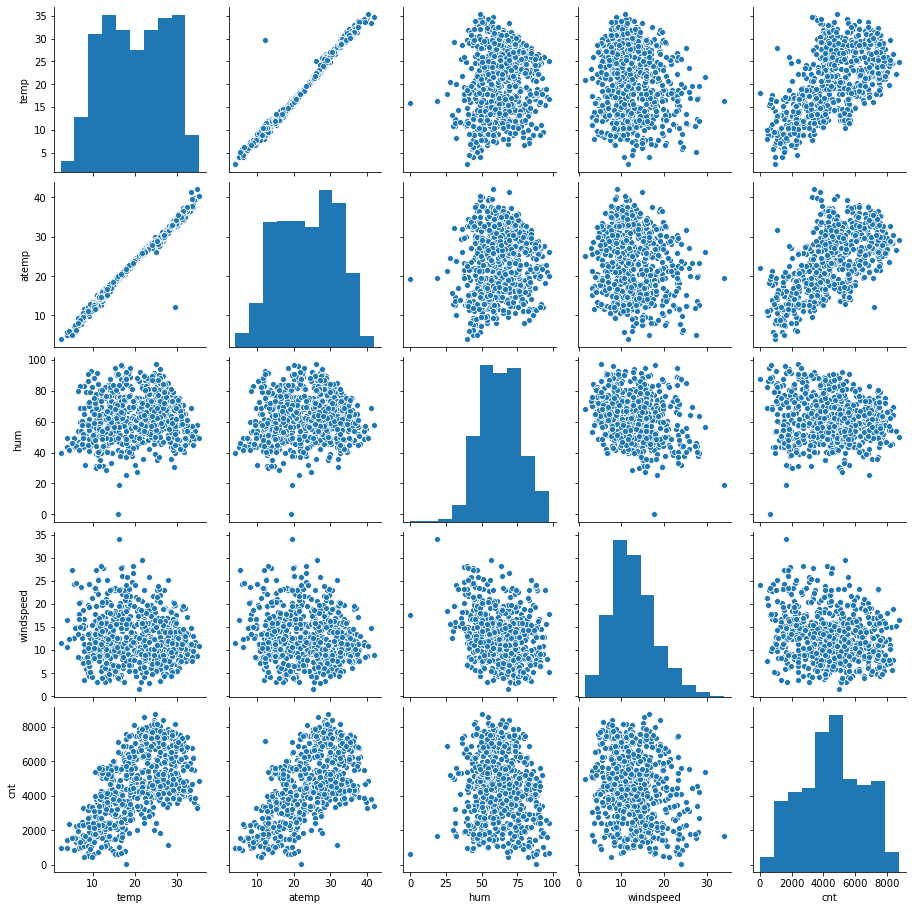

In [23]:
# Lets perform some Analysis on the data now and get some insights

sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

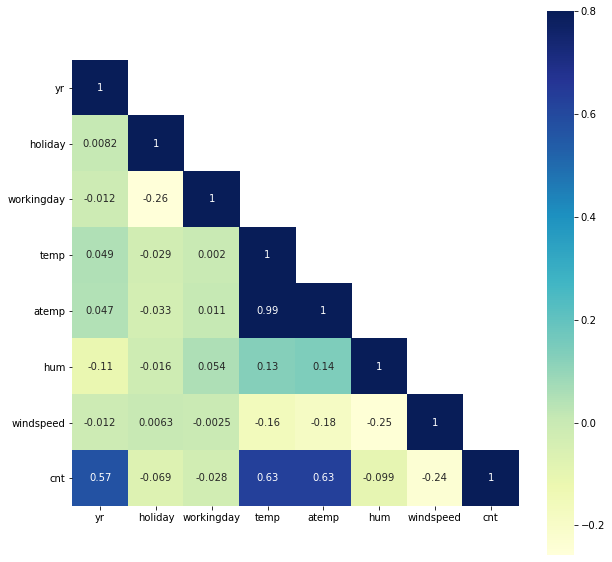

In [24]:
#here it is vital that temp and atemp have very linear realtionship. Lets check their correlation

mask = np.array(bike.corr())
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(bike.corr(), mask=mask, vmax=0.8, square=True, annot=True,cmap='YlGnBu')
plt.show()

In [25]:
# here the correlation between 'temp' and 'atemp' is 0.99 and this shows they are highly correlated
#So lets drop atemp column

bike.drop(['atemp'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


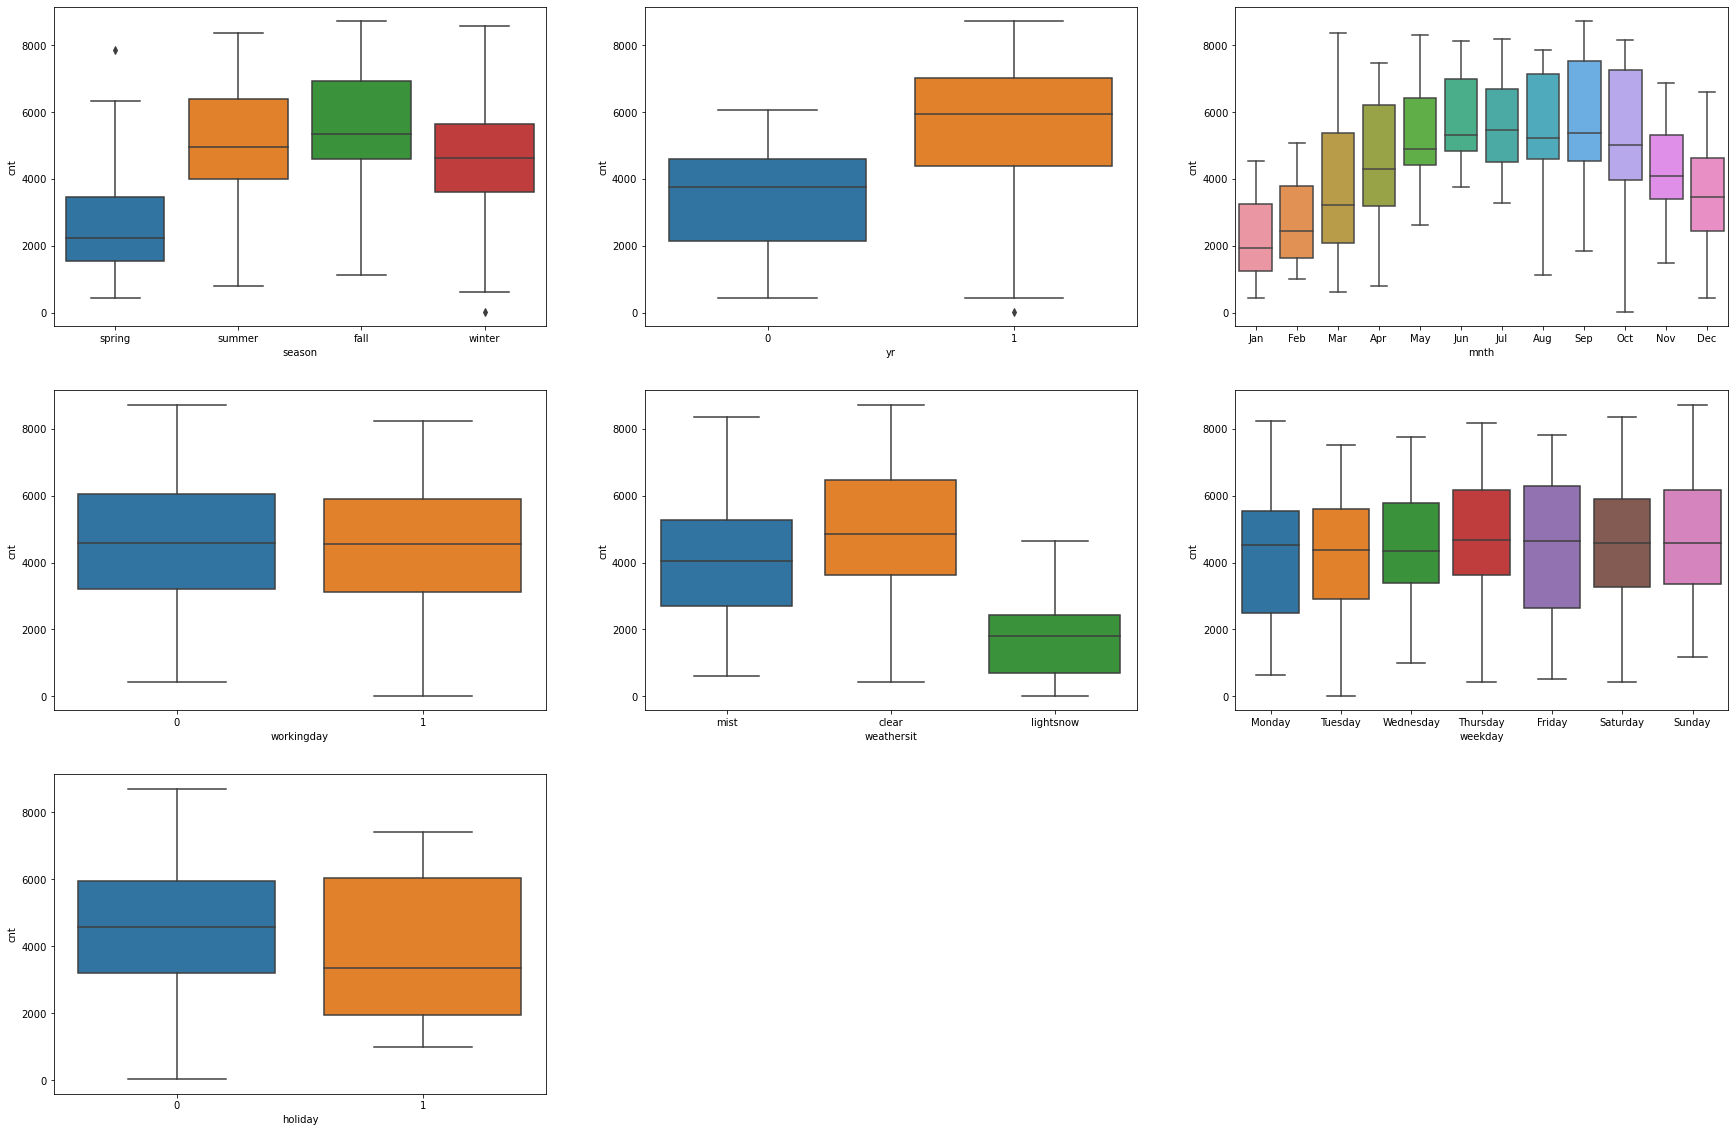

In [26]:
#Visualising categorical Variables to understand data better
#yr','mnth','workingday','weathersit','weekday'

plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

## Creating Dummy Variables

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [28]:
#Creating Dummies for Categorical Variables

Season_dummy=pd.get_dummies(bike['season'],drop_first=True)
Weather_dummy=pd.get_dummies(bike['weathersit'],drop_first=True)
Day_of_week_dummy=pd.get_dummies(bike['weekday'],drop_first=True)
Month_dummy=pd.get_dummies(bike['mnth'],drop_first=True)

In [29]:
bike=pd.concat([bike,Season_dummy],axis=1)
bike=pd.concat([bike,Weather_dummy],axis=1)
bike=pd.concat([bike,Day_of_week_dummy],axis=1)
bike=pd.concat([bike,Month_dummy],axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  lightsnow   730 non-null    uint8  
 15  mist        730 non-null    uint8  
 16  Monday      730 non-null    uint8  
 17  Saturday    730 non-null    uint8  
 18  Sunday      730 non-null    uint8  
 19  Thursday    730 non-null    u

In [30]:
#Deleting the orginal columns season.weathersit,weekday,mnth

bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)
bike.drop(['weekday'],axis=1,inplace=True)
bike.drop(['mnth'],axis=1,inplace=True)

bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
bike_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,1,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,2739,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [33]:
bike_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,10.899153,68.7917,11.791732,2947,1,0,0,...,0,1,0,0,0,0,0,0,0,0
702,1,0,1,19.509153,73.3750,11.666643,6606,0,0,1,...,1,0,0,0,0,0,0,0,0,0
127,0,0,1,21.661653,63.1667,5.000712,4333,0,1,0,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [34]:
#Scaling the Numerical Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [35]:
num_vars=['temp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [36]:
#Creating X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

In [37]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,lightsnow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
#Using RFE approach for Feature Selection
# We start with 15 variables and will be using mixed approach to build a model

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('lightsnow', True, 1),
 ('mist', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [42]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'lightsnow', 'mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [44]:
X_train_rfe = X_train[cols]

In [45]:
#Building model using StatsModel:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.34e-189
Time:                        19:34:18   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,mist,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


In [49]:
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,lightsnow,mist,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0


In [50]:
#COLUMN hum (humidity) has very high VIF so we drop this  

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [51]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [52]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [53]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.57e-186
Time:                        19:34:18   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.59
8,mist,1.56


In [56]:
# Here We have received the VIF of temp as 5.17 which is above 5, but since it is an important variable for us we
#will not be removing this variable

In [57]:
#Adding Saturday and then checking if it improves model accuracy

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,lightsnow,mist,Dec,Jan,Jul,Nov,Sep,Saturday
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0,0


In [74]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.03e-185
Time:                        20:54:49   Log-Likelihood:                 506.39
No. Observations:                 510   AIC:                            -980.8
Df Residuals:                     494   BIC:                            -913.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2456      0.032      7.650      0.0

In [59]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [75]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.57e-186
Time:                        20:54:58   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.59
8,mist,1.56


In [62]:
#Adding Sunday and then checking if it improves model accuracy
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,lightsnow,mist,Dec,Jan,Jul,Nov,Sep,Sunday
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0,1


In [76]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.95e-186
Time:                        20:55:44   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     494   BIC:                            -915.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2434      0.032      7.585      0.0

In [64]:
#here Sunday also has high p-value above 0.05 so we drop it
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [65]:
#Adding WorkingDay and then checking if it improves model accuracy
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,lightsnow,mist,Dec,Jan,Jul,Nov,Sep,workingday
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0,1
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0,1
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0,0


In [79]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.57e-186
Time:                        20:56:28   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,4.68
14,workingday,3.58
4,spring,3.08
6,winter,3.07
5,summer,2.31
0,yr,2.07
12,Nov,1.81
10,Jan,1.66
11,Jul,1.59


In [68]:
#Here adding working day has a significant P-value but has a high VIF value, so we will drop 'workingday' column
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [82]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.57e-186
Time:                        20:59:05   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [73]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.59
8,mist,1.56


## Here we have checked all good possible columns . Now we stop the model building and check on which model can we choose.

## Out of all possible models lm6 gives best fit.

In [83]:
#Predict values
y_train_cnt = lm6.predict(X_train_rfe6)

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
#Calculating Residuals

res=y_train - y_train_cnt

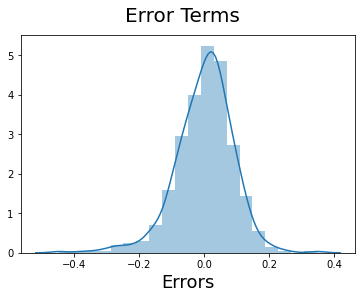

In [87]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [89]:
#Checking columns
X_train_rfe6.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'lightsnow', 'mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [90]:
print(X_train_rfe6.shape)
print(res.shape)

(510, 15)
(510,)


In [92]:
#Scaling the test data

num_vars=['temp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [93]:
#Creating x and y sets

y_test = bike_test.pop('cnt')
X_test = bike_test

In [94]:
X_train_new=X_train_rfe6.drop(['const'], axis=1)

In [95]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [96]:
X_train_rfe6.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'lightsnow', 'mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [97]:
#Making predictions on the chosen model

y_pred = lm6.predict(X_test_new)

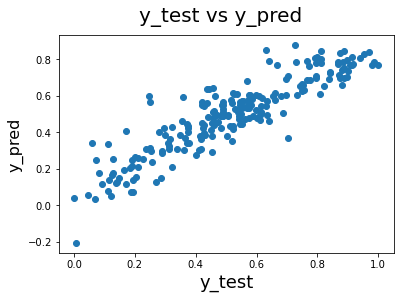

In [99]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16) 
plt.show()

## So here we have finally have a model that looks good to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [101]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10608188270949422

In [102]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8015921303387779

In [103]:
#R square of our model is 0.840

In [104]:
X_t=X_train_new.iloc[:,0].values

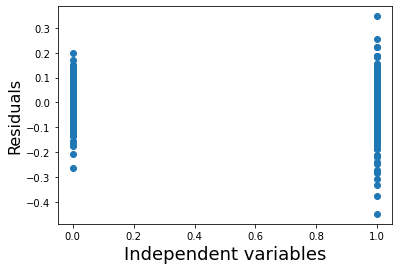

In [105]:
#Plotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)
plt.xlabel('Independent variables', fontsize=18)                    
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [106]:
X_train_new.head()

,yr,holiday,temp,windspeed,spring,summer,winter,lightsnow,mist,Dec,Jan,Jul,Nov,Sep
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0


In [107]:
print(X_train_rfe6.columns)
print(lm6.summary())

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'lightsnow', 'mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.57e-186
Time:                        21:15:49   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

## We can see that the equation for best fitted line is:


## cnt= 0.246 + 0.234 (yr) - 0.091(holiday) + 0.437 (temp) - 0.158 (windspeed) - 0.071(spring) +0.033(summer) + 0.088(winter) - 0.292(lightsnow) - 0.081(mist) - 0.044 (Dec) - 0.050 (Jan) + 0.050 (Jul) - 0.041 (Nov) + 0.068 (Sep)

## We can see the demand for bikes depends mainly on below variables:

### yr , holiday ,temp, windspeed, spring, summer, winter, lightsnow, mist, Dec, Jan, Jul, Nov, Sep

### Variables like yr, temp, summer, winter, Jul, Sep helps in increasing the Demand 

### Variables like holiday, windspeed, spring, lightsnow, mist, Dec, Jan, Nov result in decreasing the demand

## ` Final recommendations for the company:`
### `Demand is higher in month of Jul and Sept and also it is pretty high in summers and winters`